Name of Student : Harsh Agarwal<br>
Roll Number : 21b090007

#Importing necessary libraries


In [ ]:
import os  # for operating system functionalities
import warnings  # to handle warning messages
import numpy as np
import pandas as pd
import scipy  # for scientific computing
import seaborn as sns  # for statistical data visualization
from matplotlib import pyplot as plt  #
from sklearn import linear_model, preprocessing  # for machine learning tasks
from sklearn.preprocessing import MinMaxScaler, LabelEncoder  # for data preprocessing tasks
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # for splitting data and cross-validation
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, mean_absolute_error  # for model evaluation
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  # for ensemble learning methods
from sklearn.svm import SVR, SVC  # for Support Vector Machine algorithms
from IPython.display import display, Markdown  # for displaying formatted outputs
from sklearn.preprocessing import StandardScaler  # for standardizing features
from sklearn.experimental import enable_iterative_imputer  # to enable iterative imputer for imputing missing values
from sklearn.neural_network import MLPRegressor as mlp  # for multi-layer perceptron regression
from sklearn.neural_network import MLPClassifier as mlc  # for multi-layer perceptron classification
from sklearn.impute import IterativeImputer  # for imputing missing values using iterative methods
from sklearn.feature_selection import RFECV  # for recursive feature elimination with cross-validation


# *Task1*
1. Regression and out-of-distribution prediction:<br>
a. Download the wine quality datasets from https://archive.ics.uci.edu/ml/datasets/Wine+Quality<br>b. Explore, visualize, and pre-process the data as appropriate. [1]<br>
c. Train, validate varying at least one hyperparameter, and test at least two types of models: [2]<br>i. Random forest<br>
ii. Support vector regression with RBF kernel<br>
iii. Neural network with single hidden layer (output layer should have linear activation)<br>d. Search the net about how to determine the importance of each variable, and find the importance inthe final models tried. Comment on whether the same variables are important for different models.[1]<br>
e. Test the model for red with data from white and vice versa, and comment on whether the model forred wines is applicable to white wines and versa or not. [1]

In [ ]:
# List of dataframes importing from drive
list_df=[ pd.read_csv("https://raw.githubusercontent.com/harshagarwal2k02/Introduction_to_ML_EE769_2024/main/Programming%20Assignments/ProgrammingAssignment2/wine%2Bquality/winequality-red.csv", sep=";"),
         pd.read_csv("https://raw.githubusercontent.com/harshagarwal2k02/Introduction_to_ML_EE769_2024/main/Programming%20Assignments/ProgrammingAssignment2/wine%2Bquality/winequality-white.csv", sep=";")]
str1=['df1','df2']
# Dropping duplicates from each df and resetting index
[i.drop_duplicates(inplace=True) for i in list_df ]
[i.reset_index(drop=True, inplace=True) for i in list_df ]

[None, None]

In [ ]:
list_df = [df.assign(goodquality=(df['quality'] >= 7).astype(int)) for df in list_df]

In [ ]:
# Displaying information about each df using Markdown
# and the df.info() method
[display(Markdown(f"# Info df{i}")) or display(df.info()) for i, df in enumerate(list_df, start=1)]

# Info df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
 12  goodquality           1359 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 138.1 KB


None

# Info df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
 12  goodquality           3961 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 402.4 KB


None

[None, None]

In [ ]:
# Displaying top rows about each df using Markdown
# and the df.head() method
[display(Markdown(f"### Top Rows df{i}")) or display(df.head()) for i, df in enumerate(list_df, start=1)]

### Top Rows df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


### Top Rows df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


[None, None]

In [ ]:
# Concatenating the df containing null counts for each df and using display for view
display(pd.concat([pd.DataFrame(df.isnull().sum(), columns=[f'Null Counts df{i}']) for i, df in enumerate(list_df, start=1)], axis=1))

,Null Counts df1,Null Counts df2
fixed acidity,0,0
volatile acidity,0,0
citric acid,0,0
residual sugar,0,0
chlorides,0,0
free sulfur dioxide,0,0
total sulfur dioxide,0,0
density,0,0
pH,0,0
sulphates,0,0


In [ ]:
# Displaying correlation tables for each df using Markdown headers and df.corr()
[display(Markdown(f"### Correlation Table df{i}")) or display(df.corr()) for i, df in zip([1, 2], list_df)]

### Correlation Table df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024,0.116120
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214,-0.267344
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057,0.203561
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640,0.052811
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988,-0.096806
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463,-0.072771
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855,-0.135877
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252,-0.158052
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245,-0.054131
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835,0.201551


### Correlation Table df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
fixed acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636,-0.087803
volatile acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678,-0.057399
citric acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065,-0.022618
residual sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339,-0.138099
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739,-0.189573
free sulfur dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507,-0.022655
total sulfur dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356,-0.180551
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805,-0.315023
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829,0.116922
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200,0.043327


[None, None]

# Kernel Density Estimate Plot

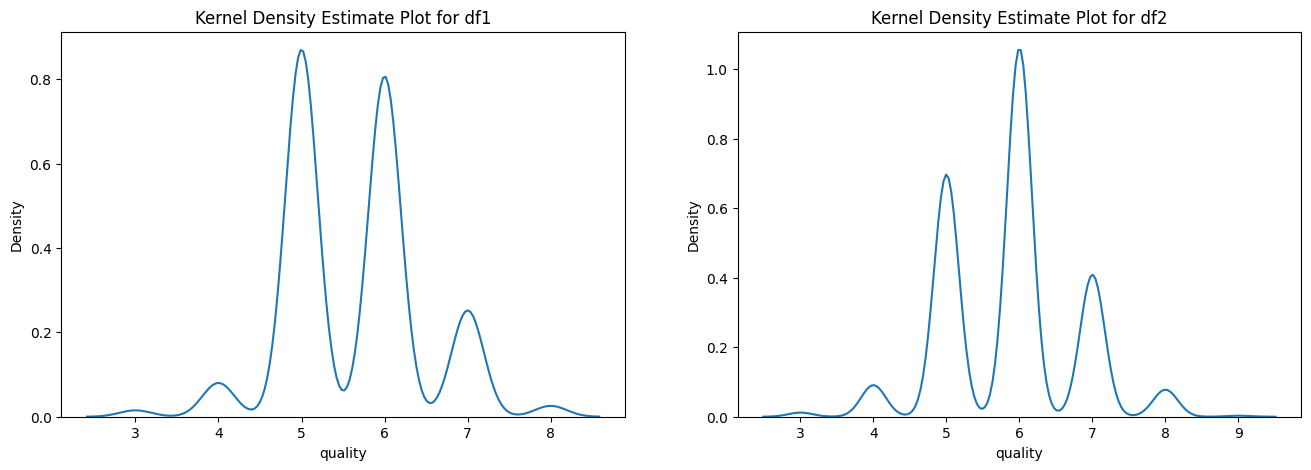

In [ ]:
# Creating subplots with 1 row and 2 columns
# Plotting the kernel density estimate plot using for quality >=2
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
for ax, df,name in zip(axes, list_df, str1):
    ax.set_title(f'Kernel Density Estimate Plot for {name}')# Plotting the kernel density estimate plot for 'quality' column where quality > 2
    sns.kdeplot(df.query('quality > 2').quality, ax=ax)
plt.show()

### Density plot df1

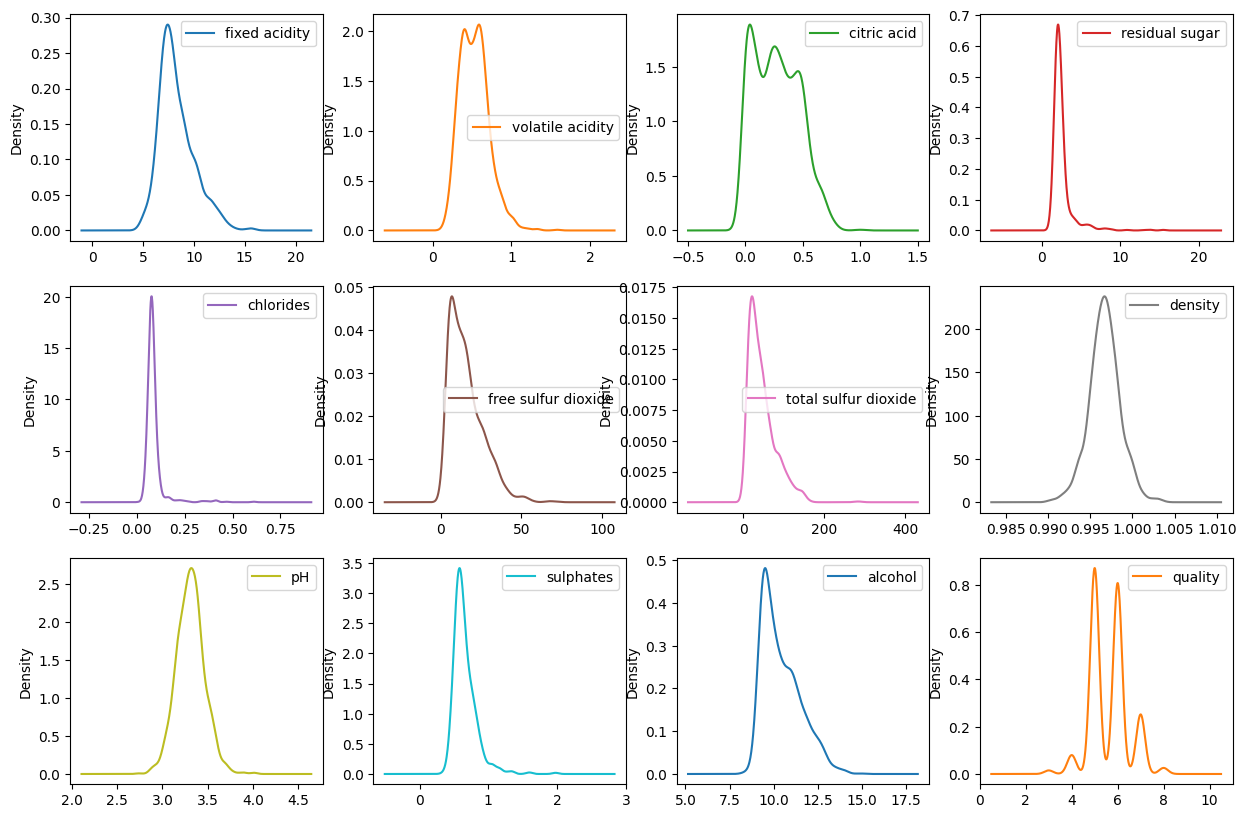

### Density plot df2

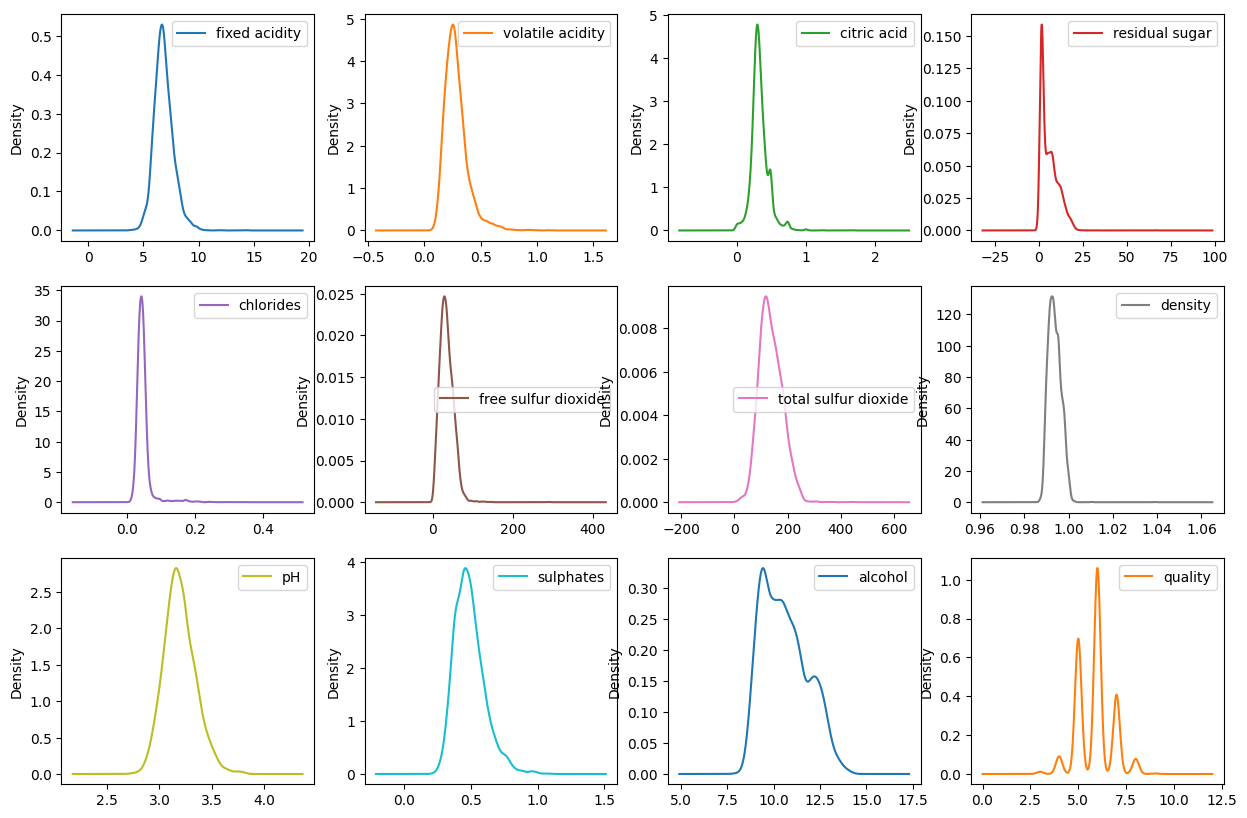

In [ ]:
for i in range(2):
    display(Markdown(f"### Density plot {str1[i]}"))
    n_columns = len(list_df[i].drop('goodquality', axis=1).columns)  # Exclude the 'goodquality' column
    n_rows = n_columns // 4 + (1 if n_columns % 4 != 0 else 0)
    fig, axes = plt.subplots(n_rows, 4, figsize=(15, 10))  # Creating subplots dynamically based on the number of n_columns in the DataFrame
    list_df[i].drop('goodquality', axis=1).plot(kind='density', subplots=True, sharex=False, ax=axes.flatten()[:n_columns])  # Plotting density plots without 'goodquality' column
    plt.show()  # Density plot df1

# Histogram

### Histogram df1

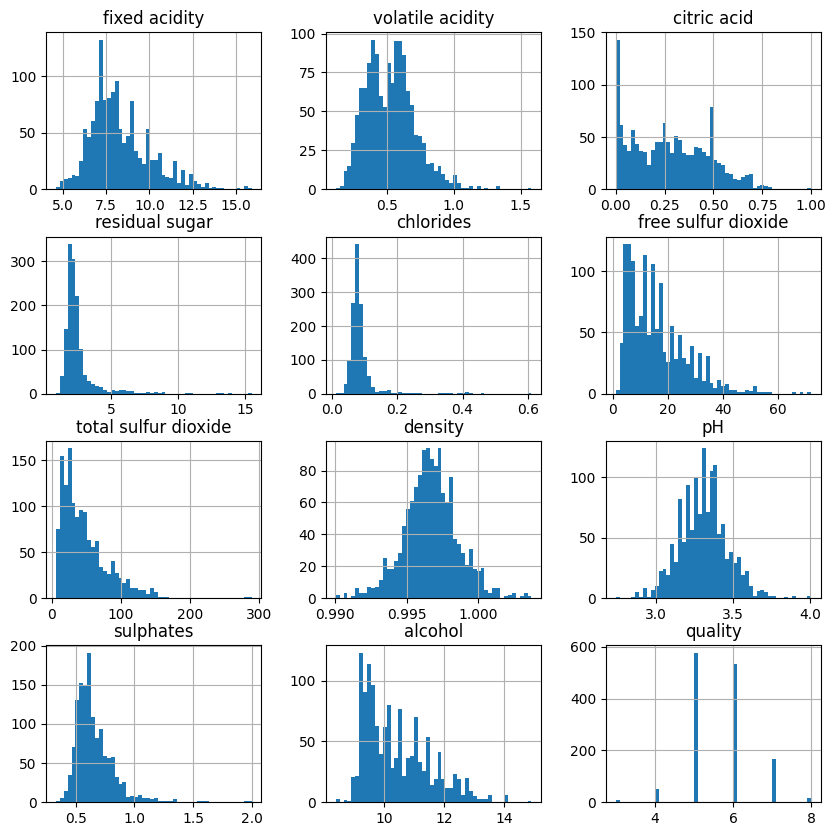

### Histogram df2

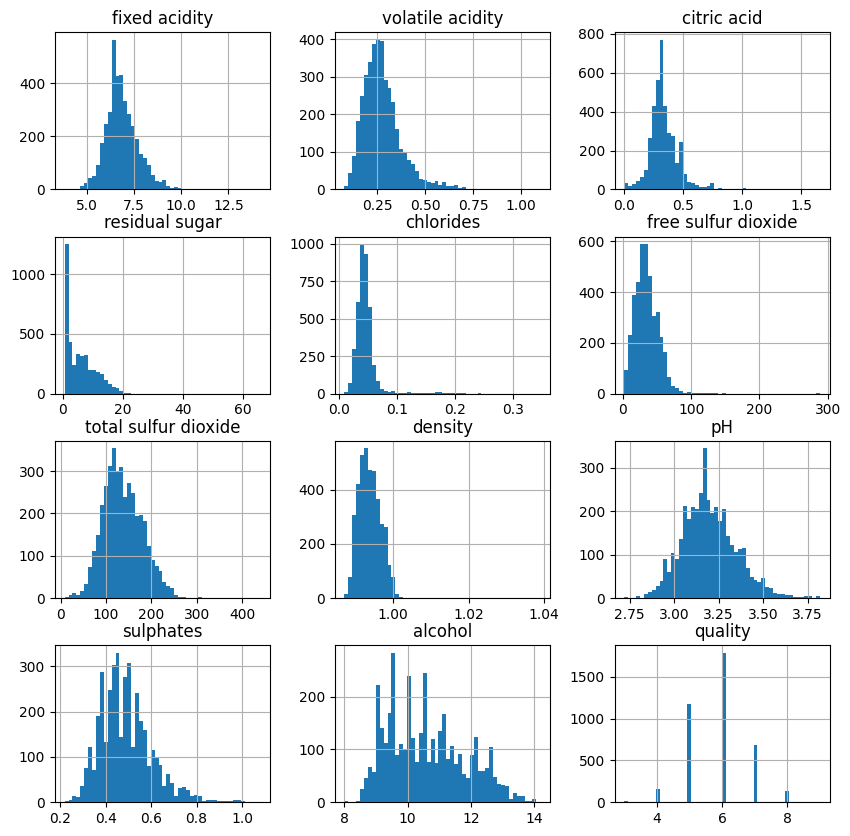

In [ ]:
for i in range(2):  # Looping through the DataFrames
    display(Markdown(f"### Histogram {str1[i]}"))  # Displaying Markdown for histogram
    columns_to_plot = list_df[i].drop('goodquality', axis=1).columns  # Excluding'goodquality' column
    list_df[i][columns_to_plot].hist(figsize=(10, 10), bins=50)
    plt.show()  # Displaying the plot

# Heatmap for expressing correlation

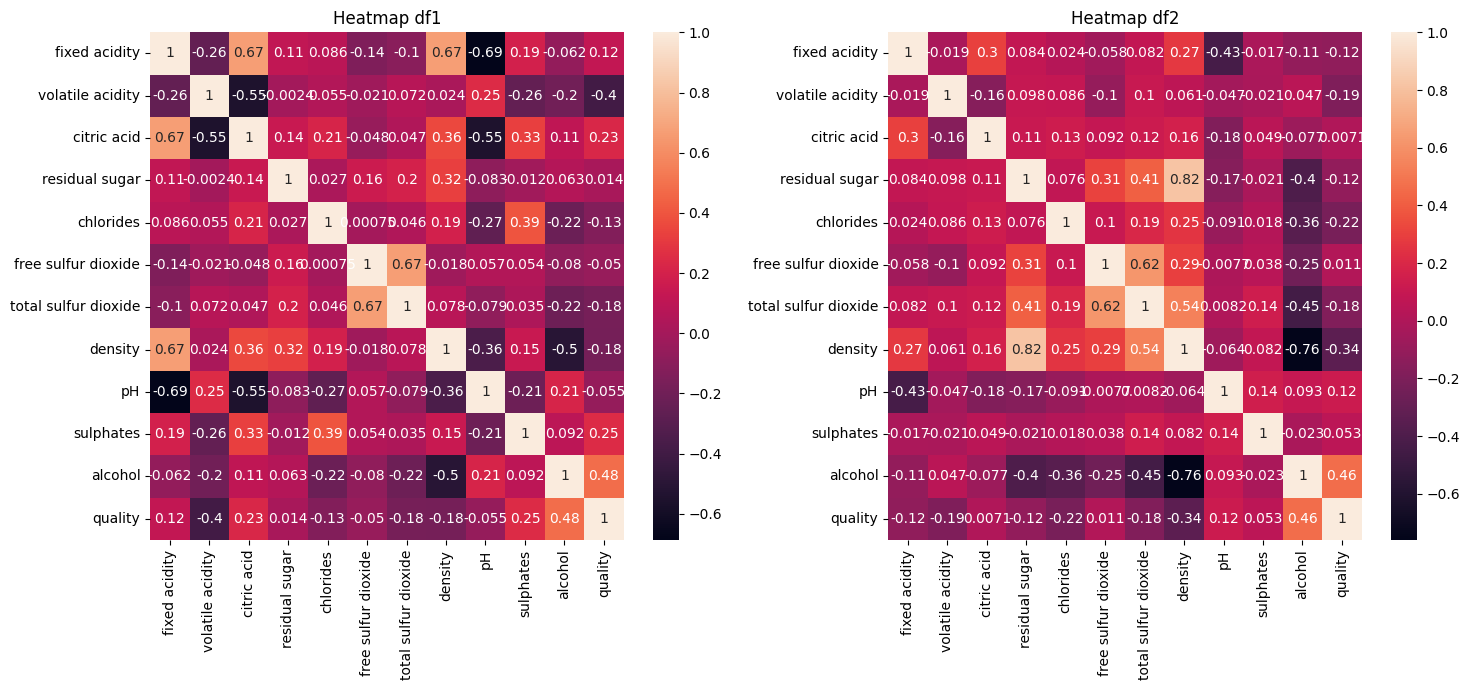

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # Creating subplots
for i in range(2):  # Looping through the DataFrames
    df_no_goodquality = list_df[i].drop('goodquality', axis=1)  # Exclude the 'goodquality' column
    sns.heatmap(df_no_goodquality.corr(), annot=True, ax=axs[i])
    axs[i].set_title(f'Heatmap {str1[i]}')
plt.tight_layout()
plt.show()

# Feature Selection

In [ ]:
# list of DataFrames excluding 'quality' and 'goodquality' columns
list_X = [df.drop(columns=['quality', 'goodquality'], errors='ignore') for df in list_df]
list_Y = [df['quality'].ge(7).astype(int) for df in list_df]#list of target variables,(target variable is whether 'quality'>= 7)

In [ ]:
[display(Markdown(f"### Feature Matrix for {str1_val} by dropping Quality and Good Quality columns")) or display(list_X[i]) for i, str1_val in enumerate(["df1", "df2"], start=0)]

### Feature Matrix for df1 by dropping Quality and Good Quality columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Feature Matrix for df2 by dropping Quality and Good Quality columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6
...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


[None, None]

In [ ]:
[display(Markdown(f"### Target Vector containing the Good Quality column values from {str_val}")) or display(list_Y[i-1]) for i, str_val in enumerate(["df1", "df2"], start=1)]

### Target Vector containing the Good Quality column values from df1

0       0
1       0
2       0
3       0
4       0
       ..
1354    0
1355    0
1356    0
1357    0
1358    0
Name: quality, Length: 1359, dtype: int64

### Target Vector containing the Good Quality column values from df2

0       0
1       0
2       0
3       0
4       0
       ..
3956    0
3957    0
3958    0
3959    1
3960    0
Name: quality, Length: 3961, dtype: int64

[None, None]

In [ ]:
for i in range(1,3):
  display(Markdown(f"###{str1[i-1]} Number of Good Quality values "))
  display((list_df[i-1]['goodquality'].value_counts()))#Good Quality value counts

###df1 Number of Good Quality values 

0    1175
1     184
Name: goodquality, dtype: int64

###df2 Number of Good Quality values 

0    3136
1     825
Name: goodquality, dtype: int64

# Feature Importance

# Splitting Dataset

In [ ]:
X_train, X_test, Y_train, Y_test, X_val, Y_val = [], [], [], [], [], []#list to store data
for X, Y in zip(list_X, list_Y):
    X_train_, X_temp_, Y_train_, Y_temp_ = train_test_split(X, Y, test_size=0.3, random_state=0)# Split data into train and temp sets
    X_val_, X_test_, Y_val_, Y_test_ = train_test_split(X_temp_, Y_temp_, test_size=0.5, random_state=0)# Split temp data into validation and test sets
    #appending values into lists
    X_train.append(X_train_)
    Y_train.append(Y_train_)
    X_test.append(X_test_)
    Y_test.append(Y_test_)
    X_val.append(X_val_)
    Y_val.append(Y_val_)


# Using Random Forest:

In [ ]:
#Function for accuracy purpose
def dis_predictions(predictions, threshold):
    return [1 if pred >= threshold else 0 for pred in predictions]#list of binary values based on threshold for calculating accuracy

In [ ]:
param1 = {'n_estimators': [i for i in range(200, 501, 50)]}
# Creating a Random Forest model instance
rf_model = RandomForestRegressor(random_state=0)
rf_val_mse, rf_test_mse, acc_rf_val, acc_rf_test = [], [], [], []# Lists to store validation MSE, test MSE, validation accuracy, and test accuracy
for i in range(1, 3):
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param1, cv=5, scoring='neg_mean_squared_error', verbose=2)# Setting up grid search with cross-validation to find the best hyperparameters for the Random Forest model
    grid_search.fit(X_train[i-1], Y_train[i-1])# Fitting the grid search to the training data for the current dataset
    # Creating the best model using the best parameters found by the grid search
    best_model = RandomForestRegressor(random_state=0, **grid_search.best_params_)
    best_model.fit(X_train[i-1], Y_train[i-1])
    # Classifying predictions as good or not based on a threshold (quality >= 7 considered good)
    valpredclass = dis_predictions(best_model.predict(X_val[i-1]), 6)
    testpredclass = dis_predictions(best_model.predict(X_test[i-1]), 6)
    # Calculating and appending validation MSE, test MSE, validation accuracy, and test accuracy
    rf_val_mse.append(mean_squared_error(Y_val[i-1], best_model.predict(X_val[i-1])))
    rf_test_mse.append(mean_squared_error(Y_test[i-1], best_model.predict(X_test[i-1])))
    acc_rf_val.append(accuracy_score(Y_val[i-1], valpredclass))
    acc_rf_test.append(accuracy_score(Y_test[i-1], testpredclass))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=200; total time=   0.6s
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=200; total time=   0.7s
[CV] END ...................................n_estimators=250; total time=   0.9s
[CV] END ...................................n_estimators=250; total time=   0.8s
[CV] END ...................................n_estimators=250; total time=   0.9s
[CV] END ...................................n_estimators=250; total time=   1.0s
[CV] END ...................................n_estimators=250; total time=   1.3s
[CV] END ...................................n_estimators=300; total time=   1.3s
[CV] END ...................................n_est

In [ ]:
#printing the mse values and accuracy values
for i, df in enumerate(str1, start=1):
    print(df.upper())
    print(f"Val_mean_sq._error for {df}", rf_val_mse[i - 1])
    print(f"Test_mean_sq._error for {df}", rf_test_mse[i - 1])
    print(f"Valid.Accuracy Score for {df}:", acc_rf_val[i - 1])
    print(f"Test.Accuracy Score for {df}:", acc_rf_test[i - 1])
    print("\n")

DF1
Val_mean_sq._error for df1 0.10440510772210118
Test_mean_sq._error for df1 0.13105809731299928
Valid.Accuracy Score for df1: 0.8578431372549019
Test.Accuracy Score for df1: 0.8333333333333334


DF2
Val_mean_sq._error for df2 0.13140178657321513
Test_mean_sq._error for df2 0.11985653232721663
Valid.Accuracy Score for df2: 0.7794612794612794
Test.Accuracy Score for df2: 0.8117647058823529




# Using Support vector regression with RBF kernel

In [ ]:
param2 = {'C': [i for i in np.linspace(1, 10, 5)], 'gamma': ['scale', 'auto']}# Defining a parameter grid for Support Vector Regression (SVR) with different values for C and gamma
svr_model = SVR(kernel='rbf')
svr_val_mse, svr_test_mse, acc_svr_val, acc_svr_test = [], [], [], []# Lists to store validation MSE, test MSE, validation accuracy, and test accuracy
for i in range(1, 3):
    grid_search = GridSearchCV(estimator=svr_model, param_grid=param2, cv=5, scoring='neg_mean_squared_error', verbose=2)# Setting up grid search with cross-validation to find the best hyperparameters for the SVR model
    grid_search.fit(X_train[i-1], Y_train[i-1])# Fitting the grid search to the training data for the current dataset
    # Creating the best model using the best parameters found by the grid search
    best_model = SVR(kernel='rbf', **grid_search.best_params_)
    best_model.fit(X_train[i-1], Y_train[i-1])
    # Classifying predictions as good or not based on a threshold (quality >= 7 considered good)
    valpredclass = dis_predictions(best_model.predict(X_val[i-1]), 6)
    testpredclass = dis_predictions(best_model.predict(X_test[i-1]), 6)
    # Calculating and appending validation MSE, test MSE, validation accuracy, and test accuracy
    svr_val_mse.append(mean_squared_error(Y_val[i-1], best_model.predict(X_val[i-1])))
    svr_test_mse.append(mean_squared_error(Y_test[i-1], best_model.predict(X_test[i-1])))
    acc_svr_val.append(accuracy_score(Y_val[i-1], valpredclass))
    acc_svr_test.append(accuracy_score(Y_test[i-1], testpredclass))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................................C=1.0, gamma=scale; total time=   0.0s
[CV] END .................................C=1.0, gamma=scale; total time=   0.0s
[CV] END .................................C=1.0, gamma=scale; total time=   0.0s
[CV] END .................................C=1.0, gamma=scale; total time=   0.0s
[CV] END .................................C=1.0, gamma=scale; total time=   0.0s
[CV] END ..................................C=1.0, gamma=auto; total time=   0.1s
[CV] END ..................................C=1.0, gamma=auto; total time=   0.1s
[CV] END ..................................C=1.0, gamma=auto; total time=   0.1s
[CV] END ..................................C=1.0, gamma=auto; total time=   0.1s
[CV] END ..................................C=1.0, gamma=auto; total time=   0.1s
[CV] END ................................C=3.25, gamma=scale; total time=   0.0s
[CV] END ................................C=3.25,

In [ ]:
#printing the mse values and accuracy values
for i, df in enumerate(str1, start=1):
    print(df.upper())
    print(f"Val_mean_sq._error for {df}", svr_val_mse[i - 1])
    print(f"Test_mean_sq._error for {df}", svr_test_mse[i - 1])
    print(f"Valid.Accuracy Score for {df}:", acc_svr_val[i - 1])
    print(f"Test.Accuracy Score for {df}:", acc_svr_test[i - 1])
    print("\n")

DF1
Val_mean_sq._error for df1 0.12313462617039363
Test_mean_sq._error for df1 0.13808133815884863
Valid.Accuracy Score for df1: 0.8578431372549019
Test.Accuracy Score for df1: 0.8333333333333334


DF2
Val_mean_sq._error for df2 0.18494887896984974
Test_mean_sq._error for df2 0.1593234535260444
Valid.Accuracy Score for df2: 0.7794612794612794
Test.Accuracy Score for df2: 0.8117647058823529




In [ ]:
scaler = StandardScaler()# Initializing a StandardScaler for feature scaling
hiddenlayer = [(50,), (100,), (200,)]# Defining different sizes of hidden layers for Multi-Layer Perceptron (MLP)
alpha = [0.0001, 0.001, 0.01]# Defining different alpha values for regularization
val_mse_hl, test_mse_hl, test_acc_hl, val_acc_hl = [], [], [], []
for i in range(1, 3):
    # Scaling training, validation, and test features
    X_train_scaled = scaler.fit_transform(X_train[i-1])
    X_val_scaled = scaler.fit_transform(X_val[i-1])
    X_test_scaled = scaler.fit_transform(X_test[i-1])
    # Initializing variables for best model and MSE
    best_model = None
    best_mse = float('inf')  # Set to infinity as we are searching for minimum
    # Looping over different hidden layer sizes
    for j in hiddenlayer:
        # Looping over different alpha values
        for k in alpha:
            #  MLPRegressor with specified parameters
            mlp_ = mlp(hidden_layer_sizes=j, activation='relu', solver='adam', alpha=k, random_state=0, max_iter=2000)
            mlp_.fit(X_train_scaled, Y_train[i-1])
            val_mse = mean_squared_error(Y_val[i-1], mlp_.predict(X_val_scaled))
            #  best model if validation MSE is lower
            if val_mse < best_mse:
                best_mse = val_mse
                best_model = mlp_
    # Appending values
    val_mse_hl.append(mean_squared_error(Y_val[i-1], best_model.predict(X_val_scaled)))
    val_acc_hl.append(accuracy_score(Y_val[i-1], dis_predictions(best_model.predict(X_val_scaled), 6)))
    test_mse_hl.append(mean_squared_error(Y_test[i-1], best_model.predict(X_test_scaled)))
    test_acc_hl.append(accuracy_score(Y_test[i-1], dis_predictions(best_model.predict(X_test_scaled), 6)))
    # Assigning the best model to the neural network model for the current dataset
    nn_model = best_model

In [ ]:
#printing the mse values and accuracy values
for i in range(1,3):
  print(str1[i-1].upper())
  print(f"Val_mean_sq._error for {str1[i-1]}", val_mse_hl[i-1])
  print(f"Test_mean_sq._error for {str1[i-1]}", test_mse_hl[i-1])
  print(f"Valid.Accuracy Score for {str1[i-1]}:", val_acc_hl[i-1])
  print(f"Test.Accuracy Score for {str1[i-1]}:", test_acc_hl[i-1])
  print("\n")

DF1
Val_mean_sq._error for df1 0.12168530727586095
Test_mean_sq._error for df1 0.12159011958541921
Valid.Accuracy Score for df1: 0.8578431372549019
Test.Accuracy Score for df1: 0.8333333333333334


DF2
Val_mean_sq._error for df2 0.1342148670766968
Test_mean_sq._error for df2 0.12196382384665456
Valid.Accuracy Score for df2: 0.7794612794612794
Test.Accuracy Score for df2: 0.8117647058823529




In [ ]:
rf_imp_list, sv_list, sv_coeff_list, nn_imp_list = [], [], [], []# Lists to store feature importances and support vectors
# Looping over training data for each model
for X_train_model, y_train_model in zip(X_train, Y_train):
    # Fitting RandomForestRegressor and extracting feature importances
    rf_model.fit(X_train_model, y_train_model)
    rf_imp = rf_model.feature_importances_
    rf_imp_list.append(rf_imp)
    # Fitting SVR and storing support vectors and dual coefficients
    svr_model.fit(X_train_model, y_train_model)
    sv_list.append(svr_model.support_vectors_)
    sv_coeff_list.append(svr_model.dual_coef_)
    # Fitting MLPRegressor and computing feature sensitivities
    nn_model.fit(X_train_model, y_train_model)
    nn_sensitivity = [abs(nn_model.predict(X_train_model.copy()) + 0.1) - nn_model.predict(X_train_model) for i in range(X_train_model.shape[1])]
    nn_imp = np.mean(nn_sensitivity, axis=0)
    nn_imp_list.append(nn_imp)
rf_svr_overlap = set(np.where(rf_imp > 0.01)[0]).intersection(*[set(np.where(np.abs(coeff) > 0.01)[0]) for coeff in sv_coeff_list])# Calculating overlap between RandomForestRegressor and SVR
rf_nn_overlap = set(np.where(rf_imp > 0.01)[0]).intersection(*[set(np.where(nn_imp > 0.01)[0]) for nn_imp in nn_imp_list])# Calculating overlap between RandomForestRegressor and MLPRegressor
svr_nn_overlap = set.intersection(*[set(np.where(np.abs(coeff) > 0.01)[0]) for coeff in sv_coeff_list], *[set(np.where(nn_imp > 0.01)[0]) for nn_imp in nn_imp_list])# Calculating overlap between SVR and MLPRegressor

In [ ]:
for rf_imp, sv, sv_coeff, nn_imp in zip(rf_imp_list, sv_list, sv_coeff_list, nn_imp_list):
    print(f"Random Forest Feature Importance:\n{rf_imp}\n")
    print(f"SVR Support Vectors:\n{sv}\n")
    print(f"SVR Coefficients:\n{sv_coeff}\n")
    print(f"Neural Network Sensitivity Analysis:\n{nn_imp}\n")
print("Variables important in both Random Forest and Neural Network:", rf_nn_overlap)
print("Variables important in both SVR and Neural Network:", svr_nn_overlap)
print("Variables important in both Random Forest and SVR:", rf_svr_overlap)

Random Forest Feature Importance:
[0.05788704 0.08467333 0.05426212 0.06977041 0.06841638 0.06155442
 0.05902331 0.05053727 0.04599386 0.17413364 0.27374822]

SVR Support Vectors:
[[10.5   0.39  0.46 ...  3.06  0.84 11.4 ]
 [ 9.1   0.3   0.34 ...  3.26  0.84 11.7 ]
 [ 9.4   0.33  0.59 ...  3.12  0.54 12.  ]
 ...
 [ 6.1   0.56  0.   ...  3.59  0.54 11.5 ]
 [11.5   0.3   0.6  ...  3.11  0.97 10.1 ]
 [ 4.7   0.6   0.17 ...  3.85  0.6  12.9 ]]

SVR Coefficients:
[[-1.          1.         -1.         -0.28224328  1.          1.
   1.          1.          1.          1.         -1.         -1.
   1.         -0.57000515 -0.11333398 -0.35740798  1.         -1.
   1.          1.          1.         -1.          1.          1.
  -0.11737945 -1.         -1.          1.          1.         -1.
  -0.04850626  1.          1.         -1.          1.         -1.
  -1.         -1.         -1.          1.          1.         -0.84571396
  -0.24692295  1.         -0.99437617 -1.         -1.         -1.
 

In [ ]:
mse_wine = []
for i in range(1, 3):
    mlp_ = mlp(hidden_layer_sizes=(200,), activation='relu', solver='adam', alpha=0.001, random_state=49, max_iter=2000)# Initializing MLPRegressor with specified parameters
    mlp_.fit(scaler.fit_transform(X_train[i-1]), Y_train[i-1])    # Fitting MLPRegressor on scaled training data
    mlp__ = mlp_.predict(scaler.fit_transform(X_test[i % 2]))# Predicting on scaled test data for the other dataset
    # Appending MSE to the list
    mse_wine.append(mean_squared_error(Y_test[i % 2], mlp__))
# Comparing MSEs of the two models
if mse_wine[0] < mse_wine[1]:  # If MSE of the first model is less than that of the second model
    print(f"The model trained on red wine data performs better on white wine data with MSE {mse_wine[0]} than the model trained on white wine data performs on red wine data with MSE {mse_wine[1]}.")
elif mse_wine[1] < mse_wine[0]:  # If MSE of the second model is less than that of the first model
    print(f"The model trained on white wine data performs better on red wine data with MSE {mse_wine[1]} than the model trained on red wine data performs on white wine data with MSE {mse_wine[0]}.")
else:  # If MSEs are equal for both models
    print(f"Both models perform similarly with MSE {mse_wine[1]} on their respective test datasets.")


The model trained on white wine data performs better on red wine data with MSE 0.17892101442967476 than the model trained on red wine data performs on white wine data with MSE 0.19120221256167716.


# Task2:
2. Classification:<br>
a. Download the data to predict Down syndrome in mice fromhttps://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression#. The prediction problem is toeither predict the genotype (binary) using the gene expression variables from DYRK1A_N to CaNA_N.<br>b. Explore, visualize, and pre-process the data as appropriate, including developing a strategy to dealwith missing variables. You can choose to impute the variable. The recommended way is to usemultivariate feature imputation (https://scikit-learn.org/stable/modules/impute.html) [1]<br>c. Train, validate varying at least one hyperparameter, and test at least two types of models: [2]<br>i. Random forest<br>
ii. Support vector classification using RBF kernel<br>
iii. Neural network with single hidden layer (output layer should be have softmax activation)<br>d. See if removing some features systematically will improve your models using recursive featureelimination https://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html). [1]


In [ ]:
df = pd.read_excel('https://raw.githubusercontent.com/harshagarwal2k02/Introduction_to_ML_EE769_2024/main/Programming%20Assignments/ProgrammingAssignment2/mice+protein+expression/Data_Cortex_Nuclear.xls',index_col=0)
display(df.head())
display(df.describe())
display(df.isnull().sum())

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
NR2A_N       3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

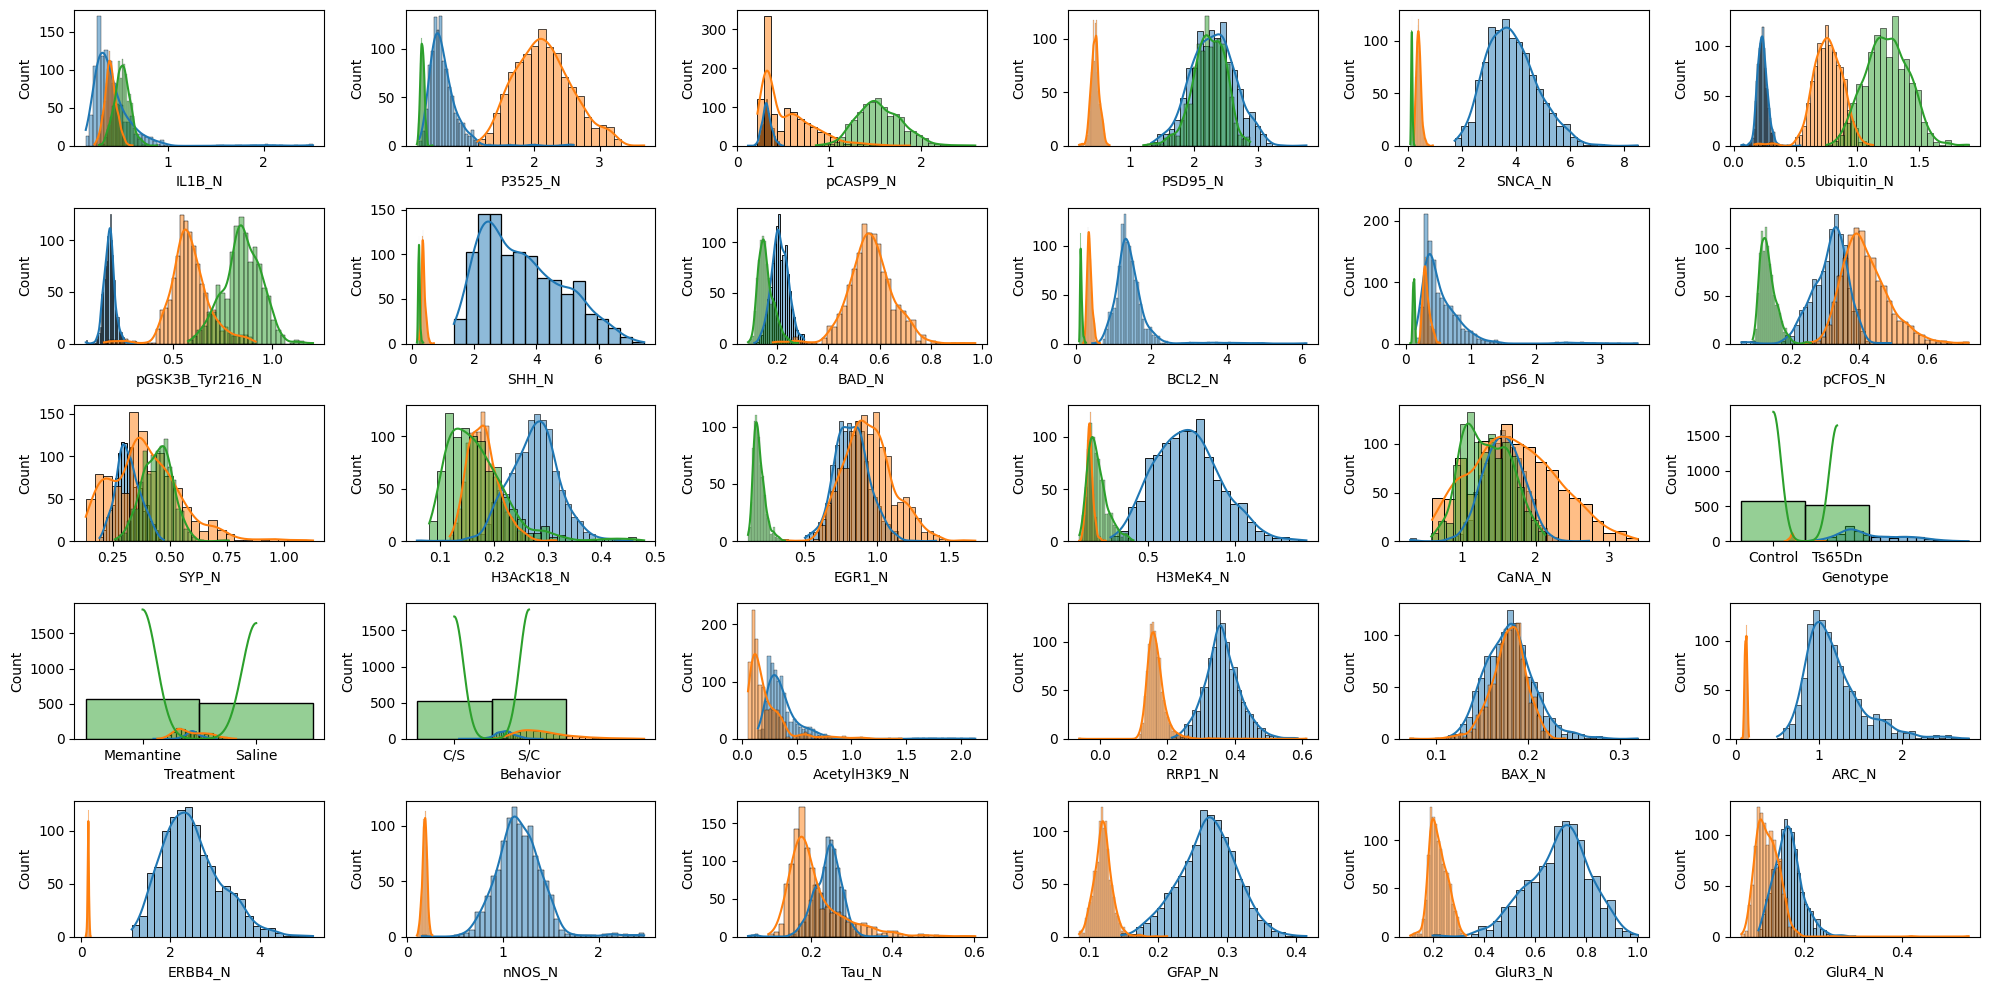

In [ ]:
plt.figure(figsize=(20, 10))  # Creating a figure for plotting
for i, column in enumerate(df.columns[:-1]):  # Looping through columns for plotting
    plt.subplot(5, 6, i % 30 + 1)  # Creating subplots
    sns.histplot(df[column], kde=True)  # Plotting histogram with kernel density estimate
    plt.xlabel(column)
plt.tight_layout()  # Adjusting layout
plt.show()  # Displaying the plots


In [ ]:
warnings.filterwarnings("ignore")
correlation_table = df.corr().round(2)
correlation_table.style.background_gradient(cmap='coolwarm', axis=None)

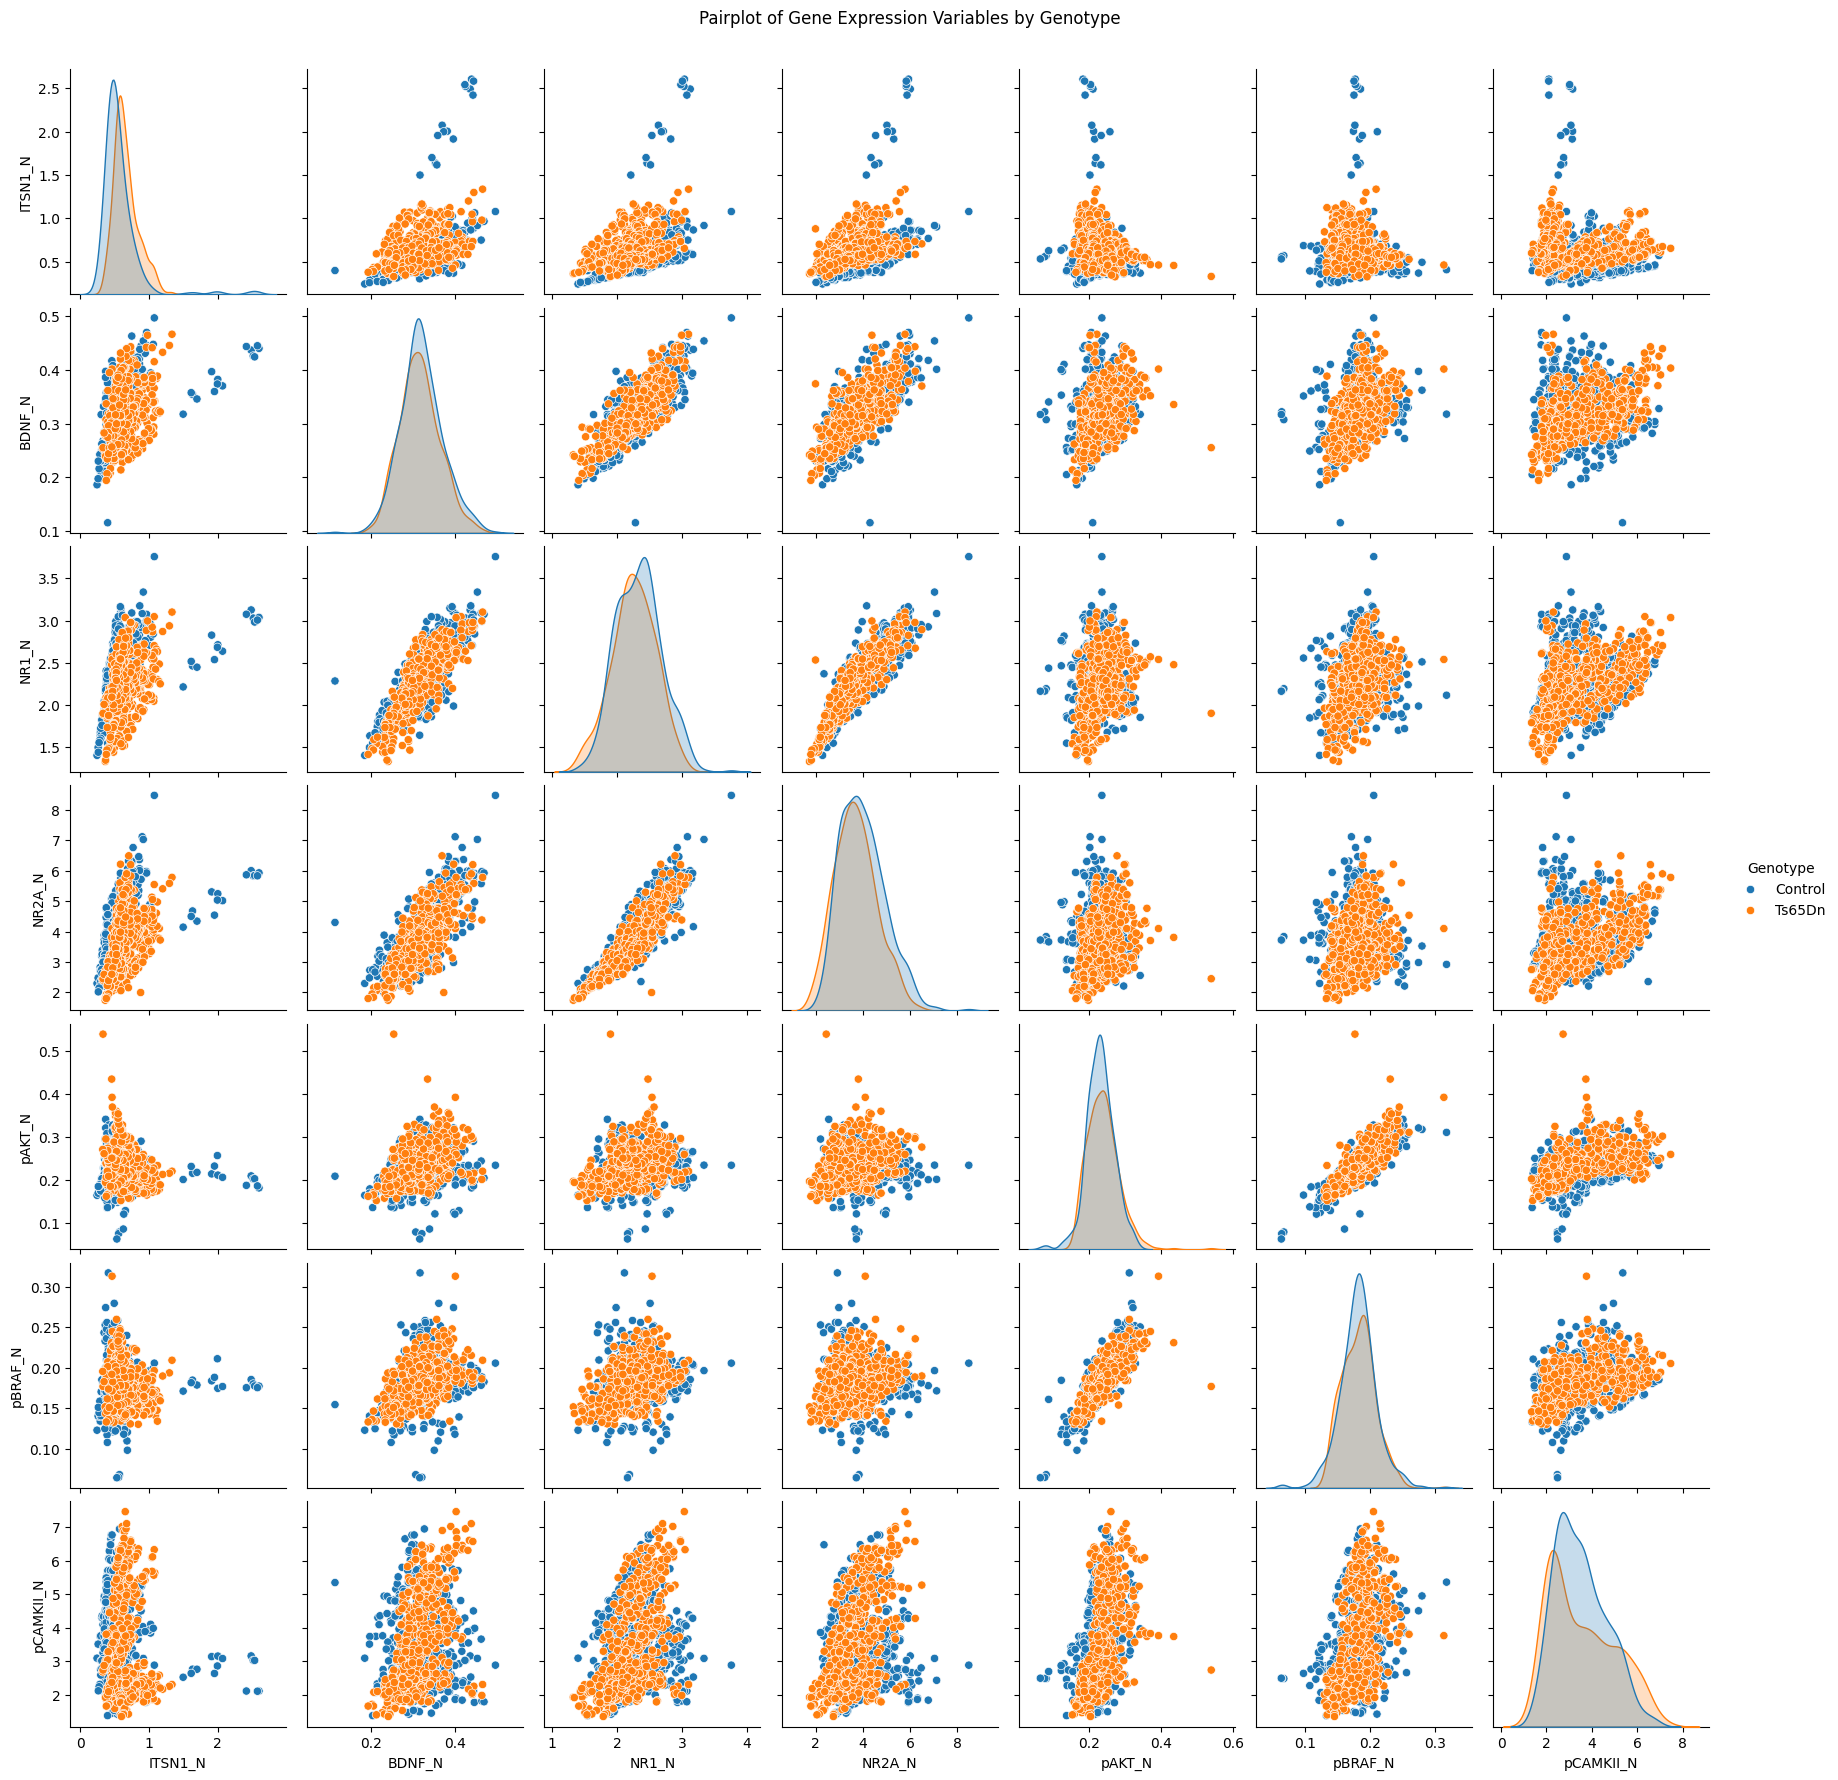

In [ ]:
sns.pairplot(df, hue='Genotype', vars=df.columns[1:8], diag_kind='kde')  # Creating pairplot with kernel density estimate on the diagonal
plt.suptitle('Pairplot of Gene Expression Variables by Genotype', y=1.02)  # Adding title to the plot
plt.show()  # Displaying the plot


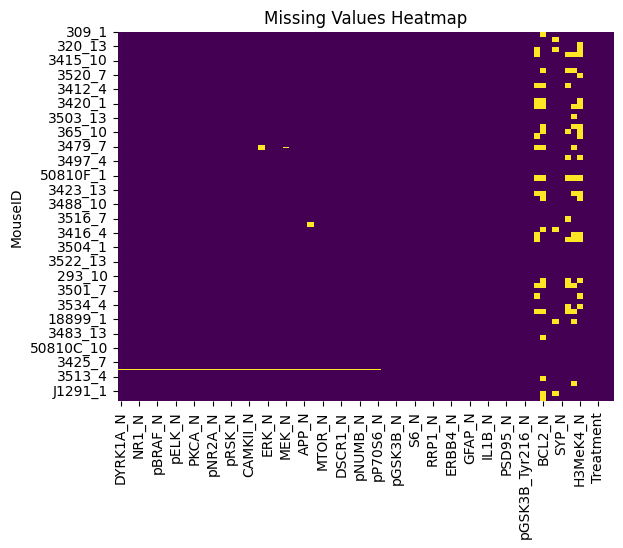

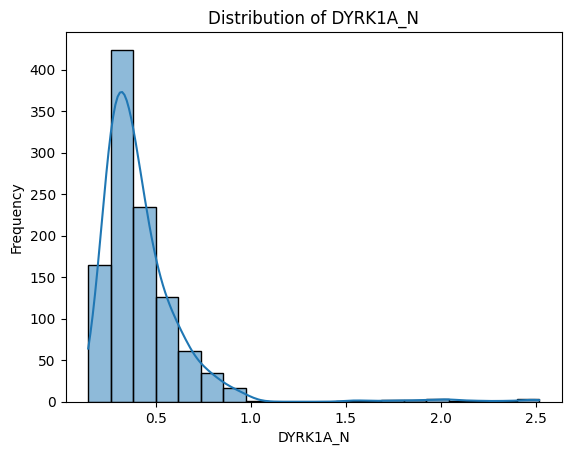

In [ ]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)  # Creating heatmap to visualize missing values
plt.title('Missing Values Heatmap')  # Adding title to the plot
plt.show()  # Displaying the plot
sns.histplot(df['DYRK1A_N'], bins=20, kde=True)  # Creating histogram with kernel density estimate
plt.xlabel('DYRK1A_N')
plt.ylabel('Frequency')
plt.title('Distribution of DYRK1A_N')  # Adding title to the plot
plt.show()  # Displaying the plot


In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])
imputed_data = IterativeImputer(random_state=0).fit_transform(df)
df= pd.DataFrame(imputed_data, columns=df.columns, index=df.index)
df=df.astype('float64')
# Check if any missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64


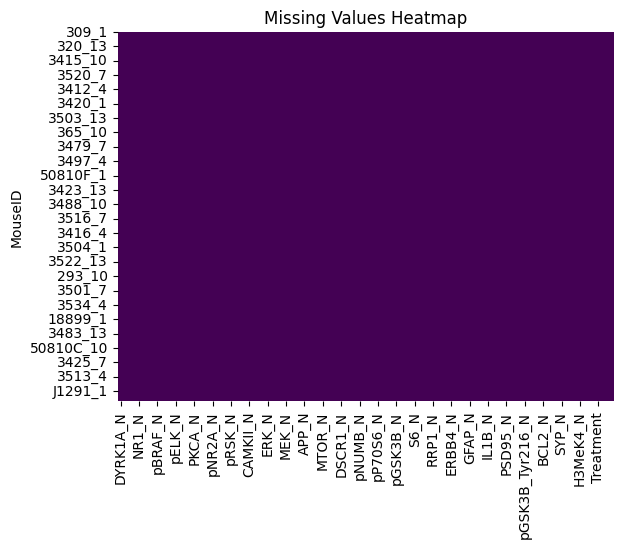

In [ ]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
features = df.loc[:, 'DYRK1A_N':'CaNA_N']
target = df['Genotype']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=49)
print(f"Number of Columns in features matrix:{features.shape[1]}")

Number of Columns in features matrix:77


In [ ]:
dict_test_acc={}
dict_train_acc={}
dict_best_param={}

# Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=10)# Initializing a RandomForestClassifier with specified parameters
parameters_1 = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}# Defining a parameter grid for hyperparameter tuning
grid1 = GridSearchCV(estimator=rf_model, param_grid=parameters_1, cv=5, scoring='accuracy')# Setting up grid search with cross-validation to find the best hyperparameters
grid1.fit(X_train, y_train)
# Creating the best RandomForestClassifier model using the best parameters found by grid search
best_rf_classifier = RandomForestClassifier(random_state=0, n_estimators=100, **grid1.best_params_, min_samples_leaf=5)
best_rf_classifier.fit(X_train, y_train)
dict_test_acc['test_accuracy_rf'] = accuracy_score(y_test, best_rf_classifier.predict(X_test))
dict_train_acc['train_accuracy_rf'] = accuracy_score(y_train, best_rf_classifier.predict(X_train))
dict_best_param['Best_Param_rf'] = grid1.best_params_


# SV_Classifier:RBFKernel

In [ ]:
svc_classifier = SVC(kernel='rbf', random_state=0)# Initializing a Support Vector Classifier (SVC) with the radial basis function (RBF) kernel
parameters2 = {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}# Defining a parameter grid for hyperparameter tuning with different values for C and gamma
# Setting up grid search with cross-validation to find the best hyperparameters for SVC
grid2 = GridSearchCV(estimator=svc_classifier, param_grid=parameters2, cv=5, scoring='accuracy')
grid2.fit(X_train, y_train)
# Creating the best SVC model using the best parameters found by grid search
best_svc_classifier = SVC(kernel='rbf', random_state=0, **grid2.best_params_)
best_svc_classifier.fit(X_train, y_train)
# Evaluating and storing the test accuracy of the best model
dict_test_acc['test_accuracy_svc'] = accuracy_score(y_test, best_svc_classifier.predict(X_test))
dict_train_acc['train_accuracy_svc'] = accuracy_score(y_train, best_svc_classifier.predict(X_train))
# Storing the best parameters found by grid search
dict_best_param['Best_Param_svc'] = grid2.best_params_


# NN_Classifier:Single Hidden Layer

In [ ]:
# Suppressing convergence warnings
warnings.filterwarnings("ignore")
# Initializing a Multi-layer Perceptron Classifier (mlc)
nn_classifier = mlc(activation='relu', solver='adam', random_state=0)
parameter3 = {'hidden_layer_sizes': [(50,), (100,), (150,)]}# Defining a parameter grid for hyperparameter tuning with different sizes of hidden layers
# Setting up grid search with cross-validation to find the best hyperparameters for mlc
grid3 = GridSearchCV(estimator=nn_classifier, param_grid=parameter3, cv=5, scoring='accuracy')
grid3.fit(X_train, y_train)
# Creating the best mlc model using the best parameters found by grid search
best_nn_classifier = mlc(activation='relu', solver='adam', random_state=42, **grid3.best_params_)
best_nn_classifier.fit(X_train, y_train)
# Evaluating and storing the train accuracy of the best model
train_accuracy_nn = accuracy_score(y_train, best_nn_classifier.predict(X_train))
test_accuracy_nn = accuracy_score(y_test, best_nn_classifier.predict(X_test))
dict_test_acc['test_accuracy_nn'] = accuracy_score(y_test, best_nn_classifier.predict(X_test))
dict_train_acc['train_accuracy_nn'] = accuracy_score(y_train, best_nn_classifier.predict(X_train))
dict_best_param['Best_Param_nn'] = grid3.best_params_


In [ ]:
[print(f"{key} is {val}") for dictionary in [dict_test_acc, dict_train_acc, dict_best_param] for key, val in dictionary.items()]

test_accuracy_rf is 0.9814814814814815
test_accuracy_svc is 1.0
test_accuracy_nn is 0.9583333333333334
train_accuracy_rf is 0.9988425925925926
train_accuracy_svc is 1.0
train_accuracy_nn is 0.9710648148148148
Best_Param_rf is {'max_depth': 15, 'min_samples_split': 2}
Best_Param_svc is {'C': 10, 'gamma': 1}
Best_Param_nn is {'hidden_layer_sizes': (150,)}


[None, None, None, None, None, None, None, None, None]

In [ ]:
# Suppressing convergence warnings
warnings.filterwarnings("ignore")
rfecv = RFECV(estimator=rf_model, cv=5, scoring='accuracy')  # Initializing RFECV for feature selection
rfecv.fit(features, target)  # Fitting RFECV to select features
selected_features = features.columns[rfecv.support_]  # Getting selected features
nn_classifier.fit(features[selected_features], target)  # Fitting classifier on selected features
cvs = cross_val_score(nn_classifier, features[selected_features], target, cv=5)
accuracy_nn_classifier = accuracy_score(target, nn_classifier.predict(features[selected_features]))
print(f"Model: {nn_classifier.__class__.__name__}, Accuracy: {accuracy_nn_classifier}; Model: {nn_classifier.__class__.__name__}, Mean Acc: {cvs.mean()}")

Model: MLPClassifier, Accuracy: 0.9574074074074074; Model: MLPClassifier, Mean Acc: 0.65


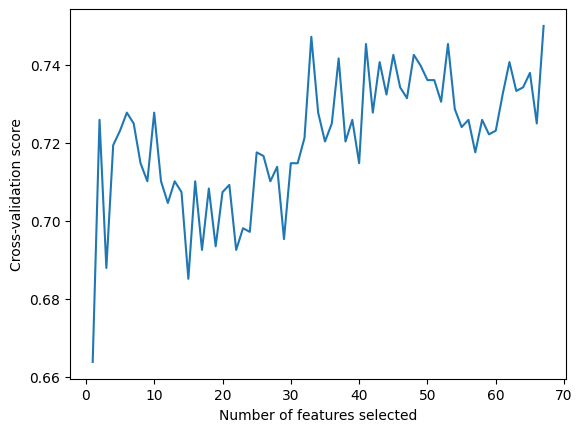

In [ ]:
# Visualize number of features vs. cross-validation score
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score")
plt.plot(range(1, rfecv.n_features_ + 1), rfecv.cv_results_['mean_test_score'][:rfecv.n_features_])
plt.show()

3. Practice using pre-trained neural networks to extract domain-specific features for new tasks.</br>
a. Read the pytorch tutorial to use a pre-trained “ConvNet as fixed feature extractor” fromhttps://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html and you can ignore
“finetuning the ConvNet”. Test this code out to see if it runs properly in your environment aftereliminating code blocks that you do not need. [1]</br>
b. Write a function that outputs ResNet18 features for a given input image. Extract features for trainingimages (in image_datasets['train']). You should get an Nx512 dimensional array. [1]</br>
c. Compare RBF kernel SVM (do grid search on kernel width and regularization) and random forest (dogrid search on max depth and number of trees). Test the final model on test data and show theresults -- accuracy and F1 score. [1]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import time
from PIL import Image
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt

cudnn.benchmark = True
plt.ion()   # interactive mode
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
warnings.filterwarnings("ignore")
# Define transformations for training and validation data
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Define the URL for downloading the dataset and the local directory for storing it
folder_path = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
data_dir = os.path.join('./data', 'hymenoptera_data')
# Check the contents of the directory to ensure it's properly set up
print("Contents of directory:", os.listdir(data_dir))
# Create ImageFolder datasets for training and validation with the specified transformations
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create DataLoader objects for efficiently loading batches of data during training and validation
dataloaders = {x: DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
# Get the size of each dataset (number of samples)
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
# Get the class names from the training dataset
class_names = image_datasets['train'].classes
# Load a pretrained ResNet-18 model and modify the fully connected layer for transfer learning
model_conv = models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, len(class_names))
# Set the device (GPU or CPU) for training the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_conv = model_conv.to(device)
# Define the loss function (cross-entropy) and the optimizer (SGD with momentum)
criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
# Define the learning rate scheduler
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
# Define a function to train the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Use a temporary directory to store the best model parameters
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')
        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        # Iterate over each epoch
        for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

            # Iterate over training and validation phases
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_corrects = 0

                # Iterate over batches of data
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    optimizer.zero_grad()

                    # Forward pass
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # Backward pass and optimization step (only during training phase)
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                if phase == 'train':
                    scheduler.step()

                # Compute epoch loss and accuracy
                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                # Print epoch statistics
                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

                # Save the best model based on validation accuracy
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            time_elapsed = time.time() - since
            print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
            print(f'Best val Acc: {best_acc:4f}')

            # Load the best model parameters
            model.load_state_dict(torch.load(best_model_params_path))

    return model
# Train the model for 25 epochs
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)


Contents of directory: ['train', 'val']
Epoch 0/24
----------
train Loss: 0.5993 Acc: 0.6803
val Loss: 0.3137 Acc: 0.8170
Training complete in 0m 42s
Best val Acc: 0.816993
Epoch 1/24
----------
train Loss: 0.4606 Acc: 0.7746
val Loss: 0.2511 Acc: 0.8889
Training complete in 1m 22s
Best val Acc: 0.888889
Epoch 2/24
----------
train Loss: 0.6398 Acc: 0.7336
val Loss: 0.1799 Acc: 0.9542
Training complete in 2m 3s
Best val Acc: 0.954248
Epoch 3/24
----------
train Loss: 0.5508 Acc: 0.7664
val Loss: 0.1960 Acc: 0.9346
Training complete in 2m 43s
Best val Acc: 0.954248
Epoch 4/24
----------
train Loss: 0.4926 Acc: 0.7664
val Loss: 0.1737 Acc: 0.9412
Training complete in 3m 24s
Best val Acc: 0.954248
Epoch 5/24
----------
train Loss: 0.5164 Acc: 0.7746
val Loss: 0.4485 Acc: 0.8039
Training complete in 4m 4s
Best val Acc: 0.954248
Epoch 6/24
----------
train Loss: 0.4068 Acc: 0.8197
val Loss: 0.2194 Acc: 0.9216
Training complete in 4m 44s
Best val Acc: 0.954248
Epoch 7/24
----------
train Los

In [ ]:
def extract_resnet_features(image):
    resnet = models.resnet18(pretrained=True)
    # Remove the last fully connected layer (classification layer) from the ResNet model
    resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
    # Set the model to evaluation mode
    resnet.eval()
    # Define transformations to be applied to the image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    # If the input is a torch.Tensor, convert it to a PIL Image
    if isinstance(image, torch.Tensor):
        image = transforms.ToPILImage()(image)
    # Apply the transformations to the image and preprocess it
    preprocessed_image = transform(image).unsqueeze(0)
    # Extract features from the preprocessed image using the ResNet model
    features = resnet(preprocessed_image).squeeze().detach().numpy()
    # Return the extracted features as a numpy array
    return features


In [ ]:
# Iterating over the 'train' and 'val' sets, extracting ResNet features and labels
# Storing them in separate lists before converting to numpy arrays for train and test sets
features_resnet = []
labels_resnet = []
for x in ['train','val']:
  a1=[]
  l1=[]
  for image_path, label in image_datasets[x]:
      features = extract_resnet_features(image_path)
      a1.append(features)
      l1.append(label)
  features_resnet.append(a1)
  labels_resnet.append(l1)
# Convert the lists of features and labels into numpy arrays for train and test sets
train_features = np.array(features_resnet[0])
train_labels = np.array(labels_resnet[0])
test_features = np.array(features_resnet[1])
test_labels = np.array(labels_resnet[1])

In [ ]:
print("Shape of the extracted train features array:", train_features.shape)
print("Shape of the extracted train labels array:", train_labels.shape)
print("Shape of the extracted test features array:", test_features.shape)
print("Shape of the extracted test labels array:", test_labels.shape)

Shape of the extracted train features array: (244, 512)
Shape of the extracted train labels array: (244,)
Shape of the extracted test features array: (153, 512)
Shape of the extracted test labels array: (153,)


In [ ]:
# Define SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')
# Define Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0)
# Set up grid search for SVM classifier
svm_grid_search = GridSearchCV(svm_classifier, {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}, cv=5)
# Fit grid search to training features and labels
svm_grid_search.fit(train_features, train_labels)
# Set up grid search for Random Forest classifier
rf_grid_search = GridSearchCV(rf_classifier, {'max_depth': [2, 10, 20], 'n_estimators': [50, 100, 200]}, cv=5)
# Fit grid search to training features and labels
rf_grid_search.fit(train_features, train_labels)
# Get best SVM and Random Forest models from grid search
best_svm_model = svm_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_
# Calculate accuracy and F1 score for SVM model on test set
svm_accuracy = accuracy_score(test_labels, best_svm_model.predict(test_features))
svm_f1_score = f1_score(test_labels, best_svm_model.predict(test_features), average='weighted')
# Calculate accuracy and F1 score for Random Forest model on test set
rf_accuracy = accuracy_score(test_labels, best_rf_model.predict(test_features))
rf_f1_score = f1_score(test_labels, best_rf_model.predict(test_features), average='weighted')
# Print results
print("SVM Accuracy:", svm_accuracy)
print("SVM F1 Score:", svm_f1_score)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score:", rf_f1_score)


SVM Accuracy: 0.7777777777777778
SVM F1 Score: 0.7777777777777778
Random Forest Accuracy: 0.7189542483660131
Random Forest F1 Score: 0.7190992107137288


#Datasets Downloaded from :
wine quality datasets:https://archive.ics.uci.edu/ml/datasets/Wine+Quality<br>
Mice down syndrom datasets: https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression#


Sources used :<br>

A pre-trained “ConvNet as fixed feature extractor” from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html<br>
Recursive feature elimination :https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html<br>
For multivariate feature imputation https://scikit-learn.org/stable/modules/impute.html